<a href="https://colab.research.google.com/github/Gabriellgpc/optimization_UFRN/blob/master/Lista_Simplex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from numpy import inf
np.set_printoptions(precision=2)

# Funções

In [2]:
def eliminacaoJordan(A, pivo):
  # normaliza a linha pivo, elemento pivo igual a 1
  A[pivo[0],:] = A[pivo[0],:]/A[pivo]
  # zera os elementos a cima e a baixo na coluna do elemento pivo
  # linha do elemento pivo
  Lp = A[pivo[0],:]
  ipivo, jpivo = pivo
  for i in range(A.shape[0]):
    if i != ipivo:
      A[i,:] = A[i,:] - A[i,jpivo]*Lp

def fatorLimitante(col_pivo, b):
  f_lim = list()
  for ai, bi in zip(col_pivo, b):
    if ai == 0.0:
      f_lim.append(inf)
    elif bi/ai < 0.0:  
      f_lim.append(inf)
    else:
      f_lim.append(bi/ai) 
  return f_lim

In [3]:
def simplex(Aa, B, itMax = 50, _it = 0):
  # Garante que os elementos da base são os elementos pivos da matriz
  if _it == 0:
    for i in range(0,len(B)):
        pivo = (i+1, B[i])
        eliminacaoJordan(Aa, pivo)
  print('({})'.format(_it))
  print(Aa)
  print('Colunas da Base:',B)
  # Var. nao basicas
  U = set(range(1,Aa.shape[1]-1))
  nB = U.difference(B)
  print('Não base:', nB)
  # Quem entra na base
  # coef. mais negativo na linha zero
  minimum = Aa[0,list(nB)].min()  
  # Quem deve sair da base
  b = Aa[:, Aa.shape[1] - 1]
  #index da coluna do elemento mais significante da linha zero 
  jpivo = Aa[0,:].tolist().index(minimum)  
  # calcula fatores limitantes para entrada de xj
  fat_lim = fatorLimitante(Aa[1:,jpivo],b[1:])
  lpivo = fat_lim.index(min(fat_lim))
  # tratando imprecisão
  if np.isclose(minimum, 0.0, rtol=1e-05, atol=1e-08):
    minimum = 0.0
  # condição de parada
  # se não tiver coef. negativo na linha zero (não melhora mais)
  # ou iterações máximas atingidas
  # ou sem fator limitante (multiplas soluções)
  if (minimum >= 0.0) or (_it == itMax) or (min(fat_lim) == inf):
    Zmax = Aa[0, -1]
    x = Aa[1:, -1].copy()
    print('X_base:')
    for xi in range(len(B)):
      print('X{0:d} = {1:04.2f}'.format(B[xi], Aa[xi+1,-1]))
    return [Zmax, x, B, _it]
  print('Fatores limitantes para entrada de X{}: {}'.format(jpivo, fat_lim))
  # atualiza Base
  B[lpivo] = jpivo
  pivo = (lpivo+1, jpivo)
  eliminacaoJordan(Aa, pivo)
  
  return simplex(Aa, B, itMax, _it = _it + 1)

# Questão 1

\begin{equation}
Máx. Z = 7x_1 + 9x_2
\end{equation}

\\
\begin{cases}
x_1 - x_2 \geq -2 \\
3x_1 + 5x_2 \geq 15 \\
5x_1 + 4x_2 \geq 20 \\
x_1,x_2 \geq 0 \\
\end{cases}

Colocando na forma canônica, utilizando variaveis de folga e variaveis artificiais, teremos:

\begin{cases}
z - 7x_1 - 9x_2 + M(x_6 + x_7) = 0\\
-x_1 + x_2 + x_3 = 2\\
-3x_1 - 5x_2 - x_4 + x_6 = 15\\
-5x_1 - 4x_2 - x_5 + x_7 = 2\\
\end{cases}

\\
\begin{equation}
A_a = 
\begin{bmatrix}
1& -7& -9& 0& 0& 0& M& M& 0\\
0& -1& 1& 1& 0& 0& 0& 0& 2\\
0& 3& 5& 0& -1& 0& 1& 0& 15\\
0& 3& 5& 0& -1& 0& 1& 0& 15\\
0& 5& 4& 0& 0& -1& 0& 1& 20
\end{bmatrix}\\
B = \{x_3, x_6, x_7\}
\end{equation}

In [4]:
# Método do M grande
M = 8
Aa = np.array([[1, -7, -9, 0, 0, 0, M, M, 0],
               [0, -1 ,1, 1 ,0, 0, 0 ,0 ,2],
               [0, 3 ,5 ,0 ,-1 ,0 ,1 ,0, 15],
               [0 ,5, 4 ,0 ,0 ,-1, 0 ,1 ,20] ], dtype = np.double)
B = [3, 6,7]
r = simplex(Aa,B)

(0)
[[   1.  -71.  -81.    0.    8.    8.    0.    0. -280.]
 [   0.   -1.    1.    1.    0.    0.    0.    0.    2.]
 [   0.    3.    5.    0.   -1.    0.    1.    0.   15.]
 [   0.    5.    4.    0.    0.   -1.    0.    1.   20.]]
Colunas da Base: [3, 6, 7]
Não base: {1, 2, 4, 5}
Fatores limitantes para entrada de X2: [2.0, 3.0, 5.0]
(1)
[[   1. -152.    0.   81.    8.    8.    0.    0. -118.]
 [   0.   -1.    1.    1.    0.    0.    0.    0.    2.]
 [   0.    8.    0.   -5.   -1.    0.    1.    0.    5.]
 [   0.    9.    0.   -4.    0.   -1.    0.    1.   12.]]
Colunas da Base: [2, 6, 7]
Não base: {1, 3, 4, 5}
Fatores limitantes para entrada de X1: [inf, 0.625, 1.3333333333333333]
(2)
[[  1.     0.     0.   -14.   -11.     8.    19.     0.   -23.  ]
 [  0.     0.     1.     0.38  -0.12   0.     0.12   0.     2.62]
 [  0.     1.     0.    -0.62  -0.12   0.     0.12   0.     0.62]
 [  0.     0.     0.     1.62   1.12  -1.    -1.12   1.     6.38]]
Colunas da Base: [2, 1, 7]
Não base: {

# Questão 2

\begin{equation}
Máx. Z = 3x_1 + 2x_2 + 5x_3
\end{equation}

\begin{cases}
z -3x_1 - 2x_2 - 5x_3 = 0\\
2x_1 + 3x_2 + 4x_3 \leq 10\\
5x_1 + 6x_2 + 2x_3 \leq 12
\end{cases}

Váriaveis de folga,

\begin{cases}
z -3x_1 - 2x_2 - 5x_3 = 0\\
2x_1 + 3x_2 + 4x_3 + x_4 = 10\\
5x_1 + 6x_2 + 2x_3 + x_5 = 12
\end{cases}

\\
\begin{bmatrix} 
1 & -3 & -2 & -5 & 0 & 0 & 0  \\ 
0 &  2 &  3 &  4 & 1 & 0 & 10 \\ 
0 &  5 &  6 &  2 & 0 & 1 & 12 \\ 
\end{bmatrix}

Base inicial, $B = \{x_4, x_5\}$



In [5]:
Aa = np.array([[1, -3, -2, -5, 0, 0, 0],
               [0, 2, 3, 4, 1, 0, 10,],
               [0, 5, 6, 2, 0, 1, 12]], dtype = float)
B = [4, 5]

r = simplex(Aa, B, itMax = 10)

(0)
[[ 1. -3. -2. -5.  0.  0.  0.]
 [ 0.  2.  3.  4.  1.  0. 10.]
 [ 0.  5.  6.  2.  0.  1. 12.]]
Colunas da Base: [4, 5]
Não base: {1, 2, 3}
Fatores limitantes para entrada de X3: [2.5, 6.0]
(1)
[[ 1.   -0.5   1.75  0.    1.25  0.   12.5 ]
 [ 0.    0.5   0.75  1.    0.25  0.    2.5 ]
 [ 0.    4.    4.5   0.   -0.5   1.    7.  ]]
Colunas da Base: [3, 5]
Não base: {1, 2, 4}
Fatores limitantes para entrada de X1: [5.0, 1.75]
(2)
[[ 1.    0.    2.31  0.    1.19  0.12 13.38]
 [ 0.    0.    0.19  1.    0.31 -0.12  1.62]
 [ 0.    1.    1.12  0.   -0.12  0.25  1.75]]
Colunas da Base: [3, 1]
Não base: {2, 4, 5}
X_base:
X3 = 1.62
X1 = 1.75


# Questão 3

\begin{equation}
Máx. Z = x_4 + x_5 + x_6\\
\begin{cases}
-x_1 - 2x_3 + x_4 = 5\\
2x_1 - 3x_2 + x_3 + x_5 = 3\\
2_x1 - 5x_2 + 6x_3 + x_6 = 5\\
x_1,x_2,x_3 \geq 0 \\
x_4,x_5,x_6: qualquer
\end{cases}
\end{equation}

Substituição de variaveis,

\begin{cases}
x_4 = x'_4 - x''_4\\
x_5 = x'_5 - x''_5\\
x_6 = x'_6 - x''_6
\end{cases}

\begin{cases}
Z - x'_4 + x''_4 - x'_5 + x''_5 - x'_6 + x''_6 = 0\\
-x_1 + 2x_3 + x'_4 - x''_4 = 5\\
2x_1 - 3x_2 + x_3 + x'_5 - x''_5 = 3\\
2x_1 - 5x_2 + 6x_3 + x'_6 - x''_6 = 5
\end{cases}

Com isso temos um sistema em que todas as variaveis são $x \geq 0$.

\begin{equation}
A_a = 
\begin{bmatrix}
1& 0& 0& 0& -1& 1& -1& 1& -1& 1& 0\\
0& -1& 0& -2& 1& -1& 0& 0& 0& 0& 5\\
0& 2& -3& 1& 0& 0& 1& -1& 0& 0& 3\\
0& 2& -5& 6& 0& 0& 0& 0& 1& -1& 5
\end{bmatrix}
\\
B = \{x'_4, x''_5, x'_6\}
\end{equation}


In [6]:
# x4, x5, x6 qualquer
Aa = np.array([[1, 0, 0, 0, 1, -1, 1, -1, 1, -1, 0],
               [0, -1, 0, -2, 1, -1, 0, 0, 0, 0, 5],
               [0, 2, -3, 1, 0, 0, 1, -1, 0, 0, 3],
               [0, 2, -5, 6, 0, 0, 0, 0, 1, -1, 5]],dtype = float)
B = [4, 6, 8]

r = simplex(Aa,B)

(0)
[[  1.  -3.   8.  -5.   0.   0.   0.   0.   0.   0. -13.]
 [  0.  -1.   0.  -2.   1.  -1.   0.   0.   0.   0.   5.]
 [  0.   2.  -3.   1.   0.   0.   1.  -1.   0.   0.   3.]
 [  0.   2.  -5.   6.   0.   0.   0.   0.   1.  -1.   5.]]
Colunas da Base: [4, 6, 8]
Não base: {1, 2, 3, 5, 7, 9}
Fatores limitantes para entrada de X3: [inf, 3.0, 0.8333333333333334]
(1)
[[ 1.   -1.33  3.83  0.    0.    0.    0.    0.    0.83 -0.83 -8.83]
 [ 0.   -0.33 -1.67  0.    1.   -1.    0.    0.    0.33 -0.33  6.67]
 [ 0.    1.67 -2.17  0.    0.    0.    1.   -1.   -0.17  0.17  2.17]
 [ 0.    0.33 -0.83  1.    0.    0.    0.    0.    0.17 -0.17  0.83]]
Colunas da Base: [4, 6, 3]
Não base: {1, 2, 5, 7, 8, 9}
Fatores limitantes para entrada de X1: [inf, 1.2999999999999998, 2.5000000000000004]
(2)
[[ 1.   0.   2.1  0.   0.   0.   0.8 -0.8  0.7 -0.7 -7.1]
 [ 0.   0.  -2.1  0.   1.  -1.   0.2 -0.2  0.3 -0.3  7.1]
 [ 0.   1.  -1.3  0.   0.   0.   0.6 -0.6 -0.1  0.1  1.3]
 [ 0.   0.  -0.4  1.   0.   0.  -0.2 


# Questão 4

Método gráfico.

\begin{cases}
x_2 = \frac{z_0 - 7x_1}{9}\\
x_2 \leq x_1 + 2\\
x_2 \leq \frac{3x_1 - 15}{5}\\
x_2 \leq \frac{5x_1 - 20}{4}\\
\end{cases}

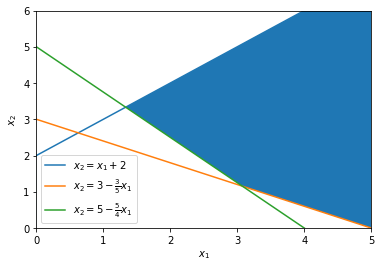

In [7]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(0, 20, 100)
x2 = [x1 + 2, 3.0 - (3.0/5.0)*x1, 5.0 - (5.0/4.0)*x1]

plt.plot(x1, x2[0], label = r'$x_2 = x_1 + 2$')
plt.plot(x1, x2[1], label = r'$x_2 = 3 - \frac{3}{5}x_1$')
plt.plot(x1, x2[2], label = r'$x_2 = 5 - \frac{5}{4}x_1$')

plt.fill_between(x1, x2[0], 0)
plt.fill_between(x1, x2[2], 0, facecolor='white')
plt.fill_between(x1, x2[1], 0, facecolor='white')

plt.legend()
plt.xlim([0,5])
plt.ylim([0,6])
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')
plt.show()

Podemos observar então que não existe uma solução ótima, pois o maior $Z$ é um valor infinito, porém devido a natura do algoritmo simplex, ele converge para um valor em que se encontrado o vertex que resulta no maior $Z$ dentre os outros vertex, nesse caso é em $x_1 \cong 1.3$ e $x_2 \cong 3.3$.

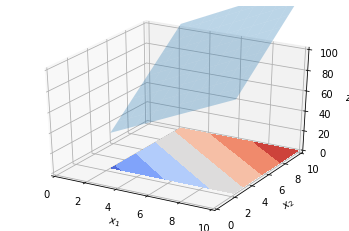

In [8]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

x1 = np.linspace(0, 10, 100) 
x2 = np.linspace(0, 10, 100)
mask = ((x1 - x2) >= -2.0) & ((3*x1 + 5*x2) >= 15) & ((5*x1  + 4*x2) >= 20)

x1= x1[mask]
x2= x2[mask]
x1, x2 = np.meshgrid(x1, x2)
# Plot the 3D surface
z = 7*x1 + 9*x2
ax.plot_surface(x1, x2, z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(x1, x2, z, zdir='z', offset=0, cmap=cm.coolwarm)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 100)

ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$z$')

plt.show()

# Questão 5

\begin{equation}
Máx. Z = 4x_1 + 2x_2 + 2x_3\\
\begin{cases}
x_1 + x_2 + 2x_3 \leq 4\\
4x_1 -5x_2 + 3x_3 \leq 30\\
x_1, x_3 \geq 0; x_2: qualquer
\end{cases}
\end{equation}

Adaptações para poder aplicar o simplex,

\begin{equation}
x_2 = x'_2 - x''_2\\
x'_2,x''_2 \geq 0
\end{equation}

Com isso e acrescentando variaveis de folga para resolver as inequações, teremos:

\begin{cases}
Z - 4x_1 - 2(x'_2 - x''_2) + 2x_3 = 0\\
x_1 + x'_2 - x''_2  + 2x_3 + x_4 = 4\\
4x_1 -5(x'_2 - x''_2) + 3x_3 + x_5 = 30\\
\end{cases}

\\
\begin{cases}
Z - 4x_1 -2x'_2 + 2x''_2 + 2x_3 = 0\\
x_1 + x'_2 - x''_2  + 2x_3 + x_4 = 4\\
4x_1 -5x'_2 + 5x''_2 + 3x_3 + x_5 = 30\\
x_j \geq 0 (j = 1, 2, ... 5)
\end{cases}

\\
\begin{bmatrix}
1 &-4& -2& 2& 2& 0& 0& 0\\
0 &1& 1& -1& 2& 1& 0& 4 \\
0& 4& -5& 5& 3& 0& 1& 30
\end{bmatrix}

\\
\begin{equation}
B = \{x_4, x_5\}
\end{equation}



In [9]:
# [x1,x2,x3,x4,x5,x6]
Aa = np.array([[0,-4, -2, 2, 2, 0, 0, 0],
               [0, 1, 1, -1, 2, 1, 0, 4],
               [0, 4, -5, 5, 3, 0, 1, 30]], dtype = float)
B = [5,6]

r = simplex(Aa,B)

(0)
[[ 0. -4. -2.  2.  2.  0.  0.  0.]
 [ 0.  1.  1. -1.  2.  1.  0.  4.]
 [ 0.  4. -5.  5.  3.  0.  1. 30.]]
Colunas da Base: [5, 6]
Não base: {1, 2, 3, 4}
Fatores limitantes para entrada de X1: [4.0, 7.5]
(1)
[[ 0.  0.  2. -2. 10.  4.  0. 16.]
 [ 0.  1.  1. -1.  2.  1.  0.  4.]
 [ 0.  0. -9.  9. -5. -4.  1. 14.]]
Colunas da Base: [1, 6]
Não base: {2, 3, 4, 5}
Fatores limitantes para entrada de X3: [inf, 1.5555555555555556]
(2)
[[ 0.    0.    0.    0.    8.89  3.11  0.22 19.11]
 [ 0.    1.    0.    0.    1.44  0.56  0.11  5.56]
 [ 0.    0.   -1.    1.   -0.56 -0.44  0.11  1.56]]
Colunas da Base: [1, 3]
Não base: {2, 4, 5, 6}
X_base:
X1 = 5.56
X3 = 1.56


# Questão 6

\begin{equation}
Mín. Z = -x_1 - 2x_2 + x_3\\
\begin{cases}
-2x_1 - x_2 + x_3 \geq -2\\
2x_1 - x_2 + 5x_3 \leq 6\\
-4x_1 - x_2 - x_3 \geq -6\\
x_1,x_3 \geq 0; x_2 sem\ restrição
\end{cases}
\end{equation}

Substituindo $x_2 = x'_2 - x''_2$ e acrescentando variaveis de folga ao Máx($-Z$), deixando na forma canônica teremos então:

\begin{cases}
Z& - x_1& -2x'_2& +2x''_2& + x_3&     &    &    &= 0\\
&   2x_1&  +x'_2& - x''_2& - x_3& +x_4&    &    &= 2\\
&   2x_1&  -x'_2& + x''_2&  +5x_3&    & +x_5&    &= 6\\
&   4x_1&  +x'_2& - x''_2&   +x_3&     &    &+x_6&= 6\\
\end{cases}

Sendo $x_j \geq 0 (j=1,2,3, ..., 6)$.

\\
\begin{bmatrix}
1& -1& -2& 2& 1& 0& 0& 0& 0\\
0& 2& 1& -1& -1& 1& 0& 0& 2\\
0& 2& -1& 1& 5& 0& 1& 0& 6\\
0& 4& 1& -1& 1& 0& 0& 1& 6
\end{bmatrix}


In [10]:
Aa = np.array([[1, -1, -2, 2, 1, 0, 0, 0, 0],
               [0, 2, 1, -1, -1, 1, 0, 0, 2],
               [0, 2, -1, 1, 5, 0, 1, 0, 6],
               [0, 4, 1, -1, 1, 0, 0, 1, 6]], dtype = float)
B  = [5, 6 ,7]

r = simplex(Aa, B)

(0)
[[ 1. -1. -2.  2.  1.  0.  0.  0.  0.]
 [ 0.  2.  1. -1. -1.  1.  0.  0.  2.]
 [ 0.  2. -1.  1.  5.  0.  1.  0.  6.]
 [ 0.  4.  1. -1.  1.  0.  0.  1.  6.]]
Colunas da Base: [5, 6, 7]
Não base: {1, 2, 3, 4}
Fatores limitantes para entrada de X2: [2.0, inf, 6.0]
(1)
[[ 1.  3.  0.  0. -1.  2.  0.  0.  4.]
 [ 0.  2.  1. -1. -1.  1.  0.  0.  2.]
 [ 0.  4.  0.  0.  4.  1.  1.  0.  8.]
 [ 0.  2.  0.  0.  2. -1.  0.  1.  4.]]
Colunas da Base: [2, 6, 7]
Não base: {1, 3, 4, 5}
Fatores limitantes para entrada de X4: [inf, 2.0, 2.0]
(2)
[[ 1.    4.    0.    0.    0.    2.25  0.25  0.    6.  ]
 [ 0.    3.    1.   -1.    0.    1.25  0.25  0.    4.  ]
 [ 0.    1.    0.    0.    1.    0.25  0.25  0.    2.  ]
 [ 0.    0.    0.    0.    0.   -1.5  -0.5   1.    0.  ]]
Colunas da Base: [2, 4, 7]
Não base: {1, 3, 5, 6}
X_base:
X2 = 4.00
X4 = 2.00
X7 = 0.00


Interpretando o resultado e mapeando para as varáveis do problema:
\begin{cases}
Máximo(-Z) &= 6\\
x'_2 &= 4.0\\
x_3 &= 2.0\\
x_6 &= 0.0\\
\end{cases}

Fazendo as devidas converções para o sistema original temos então:

\begin{cases}
Mín.Z &= -6\\
x_2 &= 4.0\\
x_3 &= 2.0
\end{cases}

E com essa configuração a variável de folga $x_6 = 0$.



# Questão 7

In [11]:
Aa = np.array([[1, -1, -3, 0, 0, 0, 0],
               [0, -1, 2, 1, 0, 0, 4],
               [0, 1, 1, 0, 1, 0, 6],
               [0, 1, 3, 0, 0, 1, 9]], dtype = float)
B = [3,4,5]

r = simplex(Aa, B)

(0)
[[ 1. -1. -3.  0.  0.  0.  0.]
 [ 0. -1.  2.  1.  0.  0.  4.]
 [ 0.  1.  1.  0.  1.  0.  6.]
 [ 0.  1.  3.  0.  0.  1.  9.]]
Colunas da Base: [3, 4, 5]
Não base: {1, 2}
Fatores limitantes para entrada de X2: [2.0, 6.0, 3.0]
(1)
[[ 1.  -2.5  0.   1.5  0.   0.   6. ]
 [ 0.  -0.5  1.   0.5  0.   0.   2. ]
 [ 0.   1.5  0.  -0.5  1.   0.   4. ]
 [ 0.   2.5  0.  -1.5  0.   1.   3. ]]
Colunas da Base: [2, 4, 5]
Não base: {1, 3}
Fatores limitantes para entrada de X1: [inf, 2.6666666666666665, 1.2]
(2)
[[ 1.   0.   0.   0.   0.   1.   9. ]
 [ 0.   0.   1.   0.2  0.   0.2  2.6]
 [ 0.   0.   0.   0.4  1.  -0.6  2.2]
 [ 0.   1.   0.  -0.6  0.   0.4  1.2]]
Colunas da Base: [2, 4, 1]
Não base: {3, 5}
X_base:
X2 = 2.60
X4 = 2.20
X1 = 1.20


Observando o resultado a cima, podemos notar que $x_3$ pode entrar na base sem influenciar no valor da função objetivo $Z$.

In [12]:
# Calculando o vetor de fatores limitantes para x3
f_lim = Aa[1:, -1]/Aa[1:,3]
print(f_lim)

[13.   5.5 -2. ]


Substitundo $x_1$ por $x_3$ na base, teremos então:

In [13]:
B = [2,3,1]
r = simplex(Aa,B)

(0)
[[ 1.   0.   0.   0.   0.   1.   9. ]
 [ 0.   0.   1.   0.  -0.5  0.5  1.5]
 [ 0.   0.   0.   1.   2.5 -1.5  5.5]
 [ 0.   1.   0.   0.   1.5 -0.5  4.5]]
Colunas da Base: [2, 3, 1]
Não base: {4, 5}
X_base:
X2 = 1.50
X3 = 5.50
X1 = 4.50


Sendo assim, podemos encontrar todas as soluções possiveis, todas as combinações de $x_1$ e $x_2$ que resultam nesse valor ótimo de $Z_{ótimo} = 9$, fazendo a combinação convexa desses dois resultados.


\begin{equation}
x = \alpha
\begin{bmatrix}
4.5\\
1.5
\end{bmatrix}
+ (1-\alpha)
\begin{bmatrix}
1.2\\
2.6
\end{bmatrix}
\end{equation}

ou ainda,

\begin{equation}
x = \alpha
\begin{bmatrix}
-3.3\\
1.1
\end{bmatrix}
+
\begin{bmatrix}
4.5\\
1.5
\end{bmatrix}
\end{equation}

Para todo $0 \leq \alpha \leq 1$


# Questão 8

In [14]:
Aa = np.array([[1, 0, 0, 0, 0, 1, 1, 0],
               [0, 2, 6, 2, 1, 1, 0, 3],
               [0, 6, 4, 4, -6, 0, 1, 2]], dtype = np.longdouble)
B = [5,6]

r = simplex(Aa, B)

(0)
[[  1.  -8. -10.  -6.   5.   0.   0.  -5.]
 [  0.   2.   6.   2.   1.   1.   0.   3.]
 [  0.   6.   4.   4.  -6.   0.   1.   2.]]
Colunas da Base: [5, 6]
Não base: {1, 2, 3, 4}
Fatores limitantes para entrada de X2: [0.5, 0.5]
(1)
[[ 1.   -4.67  0.   -2.67  6.67  1.67  0.    0.  ]
 [ 0.    0.33  1.    0.33  0.17  0.17  0.    0.5 ]
 [ 0.    4.67  0.    2.67 -6.67 -0.67  1.    0.  ]]
Colunas da Base: [2, 6]
Não base: {1, 3, 4, 5}
Fatores limitantes para entrada de X1: [1.5, 0.0]
(2)
[[ 1.    0.    0.    0.    0.    1.    1.    0.  ]
 [ 0.    0.    1.    0.14  0.64  0.21 -0.07  0.5 ]
 [ 0.    1.    0.    0.57 -1.43 -0.14  0.21  0.  ]]
Colunas da Base: [2, 1]
Não base: {3, 4, 5, 6}
X_base:
X2 = 0.50
X1 = 0.00


Análisando o resultado a cima, podemos observar que outra solução poderia ser colocar $x_3$ ou $x_4$ na base, sem alterar o valor da função objetivo. Calculando os fatores limitantes, podemos concluir que $x_3$ ou $x_4$ podem entrar no lugar de $x_1$.

In [15]:
# Outra solução
B = [2,3]
r = simplex(Aa, B)

(0)
[[ 1.    0.    0.    0.    0.    1.    1.    0.  ]
 [ 0.   -0.25  1.    0.    1.    0.25 -0.13  0.5 ]
 [ 0.    1.75  0.    1.   -2.5  -0.25  0.38  0.  ]]
Colunas da Base: [2, 3]
Não base: {1, 4, 5, 6}
X_base:
X2 = 0.50
X3 = 0.00


In [16]:
B = [2,4]
r = simplex(Aa,B)

(0)
[[ 1.    0.    0.    0.    0.    1.    1.    0.  ]
 [ 0.    0.45  1.    0.4   0.    0.15  0.02  0.5 ]
 [-0.   -0.7  -0.   -0.4   1.    0.1  -0.15 -0.  ]]
Colunas da Base: [2, 4]
Não base: {1, 3, 5, 6}
X_base:
X2 = 0.50
X4 = -0.00


# Questão 9

Função objetivo artificial:
\begin{equation}
Máx. Z = Máx(-W) = x_5 + x_6
\end{equation}

\begin{cases}
Z + x_5 + x_6 = 0\\
2x_1 + 6x_2 + 2x_3 + x_4 + x_5 = 4\\
6x_1 + 4x_2 + 4x_3 - 6x_4 + x_6 = 2
\end{cases}

Resultando na seguinte matriz aumentada,
\begin{bmatrix}
1 &0 &0 &0 &0 &1 &1 &0\\
0 &2 &6 &2 &1 &1 &0 &4\\
0 &6 &4 &4 &-6 &0 &1 &2
\end{bmatrix}

Cuja base óbvia é $B = \{x_5, x_6\}$


In [17]:
Aa = np.array([[1, 0, 0, 0, 0, 1, 1, 0],
               [0, 2, 6, 2, 1, 1, 0, 4],
               [0, 6, 4, 4, -6, 0, 1, 2]], dtype = np.double)
B = [5,6]
r = simplex(Aa, B)

(0)
[[  1.  -8. -10.  -6.   5.   0.   0.  -6.]
 [  0.   2.   6.   2.   1.   1.   0.   4.]
 [  0.   6.   4.   4.  -6.   0.   1.   2.]]
Colunas da Base: [5, 6]
Não base: {1, 2, 3, 4}
Fatores limitantes para entrada de X2: [0.6666666666666666, 0.5]
(1)
[[  1.     7.     0.     4.   -10.     0.     2.5   -1.  ]
 [  0.    -7.     0.    -4.    10.     1.    -1.5    1.  ]
 [  0.     1.5    1.     1.    -1.5    0.     0.25   0.5 ]]
Colunas da Base: [5, 2]
Não base: {1, 3, 4, 6}
Fatores limitantes para entrada de X4: [0.1, inf]
(2)
[[ 1.    0.    0.    0.    0.    1.    1.    0.  ]
 [ 0.   -0.7   0.   -0.4   1.    0.1  -0.15  0.1 ]
 [ 0.    0.45  1.    0.4   0.    0.15  0.03  0.65]]
Colunas da Base: [4, 2]
Não base: {1, 3, 5, 6}
X_base:
X4 = 0.10
X2 = 0.65


Analisando o resultado a cima, podemos observar que as soluções básicas possiveis são:

In [18]:
print('X4 e X1 na base:')
B = [4,1]
r = simplex(Aa,B)

print('X4 e X2 na base:')
B = [4,2]
r = simplex(Aa,B)

print('X4 e X3 na base:')
B = [4,3]
r = simplex(Aa,B)

X4 e X1 na base:
(0)
[[ 1.    0.    0.    0.    0.    1.    1.    0.  ]
 [ 0.    0.    1.56  0.22  1.    0.33 -0.11  1.11]
 [ 0.    1.    2.22  0.89  0.    0.33  0.06  1.44]]
Colunas da Base: [4, 1]
Não base: {2, 3, 5, 6}
X_base:
X4 = 1.11
X1 = 1.44
X4 e X2 na base:
(0)
[[ 1.    0.    0.    0.    0.    1.    1.    0.  ]
 [ 0.   -0.7   0.   -0.4   1.    0.1  -0.15  0.1 ]
 [ 0.    0.45  1.    0.4   0.    0.15  0.03  0.65]]
Colunas da Base: [4, 2]
Não base: {1, 3, 5, 6}
X_base:
X4 = 0.10
X2 = 0.65
X4 e X3 na base:
(0)
[[ 1.    0.    0.    0.    0.    1.    1.    0.  ]
 [ 0.   -0.25  1.    0.    1.    0.25 -0.12  0.75]
 [ 0.    1.13  2.5   1.    0.    0.38  0.06  1.63]]
Colunas da Base: [4, 3]
Não base: {1, 2, 5, 6}
X_base:
X4 = 0.75
X3 = 1.63


# Questão 10

Mínimizando a seguinte função objetivo artificial:
\begin{equation}
Mín. W = x_4 + x_5\\
Máx.(-W) = -x_4 - x_5 = Máx(W')
\end{equation}

\begin{cases}
W' + x_4 + x_5 = 0\\
3x_1 + 4x_2 + 3x_3 + x_4 = 7\\
-6x_1 + 20x_2 - 35x_3 + x_5 = 17
\end{cases}

Resultando na seguinte matriz aumentada, para ser aplicada ao algoritmo simplex.

\begin{equation}
A_a=
\begin{bmatrix}
1& 0& 0& 0& 1& 1& 0\\
0& 3& 4& 3& 1& 0& 7\\
0& -6& 20& -35& 0& 1& 17
\end{bmatrix}
\end{equation}




In [19]:
Aa_q10 = np.array([[1, 0, 0, 0, 1, 1, 0],
                  [0, 3, 4, 3, 1, 0, 7],
                  [0, -6, 20, -35, 0, 1, 17]], dtype = np.longdouble)
B = [4,5]
r = simplex(Aa_q10,B)

(0)
[[  1.   3. -24.  32.   0.   0. -24.]
 [  0.   3.   4.   3.   1.   0.   7.]
 [  0.  -6.  20. -35.   0.   1.  17.]]
Colunas da Base: [4, 5]
Não base: {1, 2, 3}
Fatores limitantes para entrada de X2: [1.75, 0.85]
(1)
[[  1.    -4.2    0.   -10.     0.     1.2   -3.6 ]
 [  0.     4.2    0.    10.     1.    -0.2    3.6 ]
 [  0.    -0.3    1.    -1.75   0.     0.05   0.85]]
Colunas da Base: [4, 2]
Não base: {1, 3, 5}
Fatores limitantes para entrada de X3: [0.35999999999999999999, inf]
(2)
[[ 1.00e+00 -4.34e-19  0.00e+00  0.00e+00  1.00e+00  1.00e+00  1.30e-18]
 [ 0.00e+00  4.20e-01  0.00e+00  1.00e+00  1.00e-01 -2.00e-02  3.60e-01]
 [ 0.00e+00  4.35e-01  1.00e+00  0.00e+00  1.75e-01  1.50e-02  1.48e+00]]
Colunas da Base: [3, 2]
Não base: {1, 4, 5}
X_base:
X3 = 0.36
X2 = 1.48


# Questão 11

$Máx Z = 3x_1 + 2x_2 - 5x_3$ utilizando a solução básica compativel da questão anterior.

Solução compativel básica da questão 10:

\begin{bmatrix}
0& 0.42& 0& 1& 0.36\\
0& 0.44& 1& 0& 1.5
\end{bmatrix}

In [20]:
# Procedimento para selecionar apenas a matriz com a solução básica, sem a linha zero
# e sem as linhas das variaveis artificiais
Aa_q11 = np.zeros((3, 5), dtype = np.double)
Aa_q11[0,:] = [1, -3, -2, 5, 0]
Aa_q11[1:,:4]= Aa_q10[1:,:4].copy()
Aa_q11[1:,-1]= Aa_q10[1:,-1].copy()
r = simplex(Aa_q11,B)

(0)
[[ 1.   -4.23  0.    0.    1.16]
 [ 0.    0.42  0.    1.    0.36]
 [ 0.    0.43  1.    0.    1.48]]
Colunas da Base: [3, 2]
Não base: {1}
Fatores limitantes para entrada de X1: [0.8571428571428571, 3.4022988505747125]
(1)
[[ 1.    0.    0.   10.07  4.79]
 [ 0.    1.    0.    2.38  0.86]
 [ 0.    0.    1.   -1.04  1.11]]
Colunas da Base: [1, 2]
Não base: {3}
X_base:
X1 = 0.86
X2 = 1.11


# Questão 12

\begin{equation}
Máx. Z = 6x_1 + 10x_2
\end{equation}

Sujeita a,
\begin{cases}
x_1 \leq 8\\
x_2 \leq 12\\
6x_1 + 4x_2 \geq 36\\
x_1,x_2 \geq 0
\end{cases}

## Solução gráfica

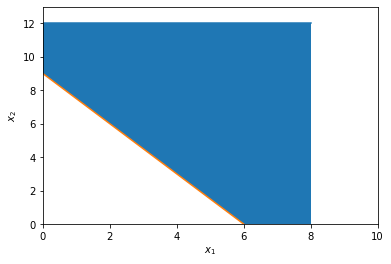

In [21]:
#@title
import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(0, 8, 100)
x2 = [[12]*100, (36 - 6*x1)/4.0]

plt.plot(x1, x2[0])
plt.plot(x1, x2[1])

plt.fill_between(x1, x2[0], 0)
plt.fill_between(x1, x2[1], 0, facecolor = 'white')

plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')
plt.xlim([0,10])
plt.ylim([0,13])
plt.show()

Análisando o gráfico podemos notar que o máximo de $Z$ ocorre quando $x_1 = 8$ e $x_2 = 12$, resultando em $Z = 168$

## Função objetivo artificial

Acrescentando variaveis de folga e uma variável artificial teremos,

\begin{cases}
x_1 + x_3 = 8\\
x_2 + x_4 = 12\\
6x_1 + 4x_2 - x_5 + x_6 = 36
\end{cases}

E para minimizar a váriavel artificial para obtermos uma solução compativel básica inicial teremos a seguinte função objetivo artificial, $W = x_6$

\begin{equation}
 Máx.(-W) = -x_6 = Máx.(W')
\end{equation}

\\
\begin{cases}
W' + x_6 = 0\\
x_1 + x_3 = 8\\
x_2 + x_4 = 12\\
6x_1 + 4x_2 - x_5 + x_6 = 36
\end{cases}

Resultando na seguinte matriz aumentada,
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 1& 0\\
0& 1& 0& 1& 0& 0& 0& 8\\
0& 0& 1& 0& 1& 0& 0& 12\\
0& 6& 4& 0& 0& -1& 1& 36
\end{bmatrix}



In [22]:
Aa_b = np.array([[1, 0, 0, 0, 0, 0, 1, 0],
               [0, 1, 0, 1, 0, 0, 0, 8],
               [0, 0, 1, 0, 1, 0, 0, 12],
               [0, 6, 4, 0, 0, -1, 1, 36]], dtype = np.double)
B = [3, 4, 6]

r = simplex(Aa_b,B)

(0)
[[  1.  -6.  -4.   0.   0.   1.   0. -36.]
 [  0.   1.   0.   1.   0.   0.   0.   8.]
 [  0.   0.   1.   0.   1.   0.   0.  12.]
 [  0.   6.   4.   0.   0.  -1.   1.  36.]]
Colunas da Base: [3, 4, 6]
Não base: {1, 2, 5}
Fatores limitantes para entrada de X1: [8.0, inf, 6.0]
(1)
[[ 1.    0.    0.    0.    0.    0.    1.    0.  ]
 [ 0.    0.   -0.67  1.    0.    0.17 -0.17  2.  ]
 [ 0.    0.    1.    0.    1.    0.    0.   12.  ]
 [ 0.    1.    0.67  0.    0.   -0.17  0.17  6.  ]]
Colunas da Base: [3, 4, 1]
Não base: {2, 5, 6}
X_base:
X3 = 2.00
X4 = 12.00
X1 = 6.00


## Simplex

utilizando a solução base inicial do item anterior e trocando a linha zero pela função objetivo, $Z = 6x_1 + 10x_2$, teremos:

In [23]:
Aa_c = np.zeros((4,7), dtype = np.double)
Aa_c[0,:] = [1, -6, -10, 0, 0, 0, 0]
Aa_c[1:,:6]= Aa_b[1:,:6]
Aa_c[1:,-1]= Aa_b[1:,-1]

r = simplex(Aa_c,B)

(0)
[[ 1.    0.   -6.    0.    0.   -1.   36.  ]
 [ 0.    0.   -0.67  1.    0.    0.17  2.  ]
 [ 0.    0.    1.    0.    1.    0.   12.  ]
 [ 0.    1.    0.67  0.    0.   -0.17  6.  ]]
Colunas da Base: [3, 4, 1]
Não base: {2, 5}
Fatores limitantes para entrada de X2: [inf, 12.0, 9.0]
(1)
[[ 1.    9.    0.    0.    0.   -2.5  90.  ]
 [ 0.    1.    0.    1.    0.    0.    8.  ]
 [ 0.   -1.5   0.    0.    1.    0.25  3.  ]
 [ 0.    1.5   1.    0.    0.   -0.25  9.  ]]
Colunas da Base: [3, 4, 2]
Não base: {1, 5}
Fatores limitantes para entrada de X5: [inf, 12.0, inf]
(2)
[[  1.  -6.   0.   0.  10.   0. 120.]
 [  0.   1.   0.   1.   0.   0.   8.]
 [  0.  -6.   0.   0.   4.   1.  12.]
 [  0.   0.   1.   0.   1.   0.  12.]]
Colunas da Base: [3, 5, 2]
Não base: {1, 4}
Fatores limitantes para entrada de X1: [8.0, inf, inf]
(3)
[[  1.   0.   0.   6.  10.   0. 168.]
 [  0.   1.   0.   1.   0.   0.   8.]
 [  0.   0.   0.   6.   4.   1.  60.]
 [  0.   0.   1.   0.   1.   0.  12.]]
Colunas da Base: 

# Questão 13

\begin{equation}
Máx. Z = x_2\\
\begin{cases}
2x_1 + 3x_2 \leq 9\\
|x_1 - x_2| \leq 1\\
x \geq 0
\end{cases}
\end{equation}

Para melhorar a compreensão das condições, reformatei a inequação com módulo para,

\begin{cases}
2x_1 + 3x_2 \leq 9\\
x_1 - x_2 \leq 1\\
-x_1+ x_2 \leq 1
\end{cases}

## Solução gráfica

\begin{cases}
x_2 \leq 3 - \frac{2}{3}x_1\\
x_2 \geq x_1 - 1\\
x_2 \leq x_1 + 1
\end{cases}

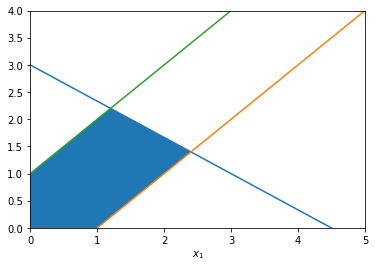

In [24]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(0,10, 100)
x2 = [3.0 - (2.0/3.0)*x1,  x1 - 1.0,  x1 + 1.0]

plt.plot(x1, x2[0])
plt.plot(x1, x2[1])
plt.plot(x1, x2[2])

plt.fill_between(x1, x2[0], 0)
plt.fill_between(x1, x2[2], x2[0], facecolor='white')
plt.fill_between(x1, x2[1], 0, facecolor='white')

plt.ylim([0,4])
plt.xlim([0,5])
plt.xlabel(r'$x_2$')
plt.xlabel(r'$x_1$')
plt.show()

O ponto ótimo para a função objetivo, analisando a região de factibilidade a cima, é $x_1 = \frac{6}{5}$ e $Z = x_2 = \frac{11}{5}$

# Questão 14